# Tarea 1 - Análisis de audio con Python y JupyterLab

## 1. Importamos librerias necesarias.

In [63]:
from scipy.io import wavfile
import IPython
import os
import numpy as np
import matplotlib.pyplot as plt

## 2. Definimos los directorios que se van a utilizar.

In [64]:
cwd = os.getcwd()
audio_input_path = os.path.join(cwd, os.path.join('assets', 'audio', 'input'))  # cambiar '_input' por 'examples'
audio_output_path = os.path.join(cwd, os.path.join('assets', 'audio', 'output'))
print(f'Directorio con los audios de entrada: {audio_input_path}')
print(f'Directorio donde guardaremos los audios generados: {audio_output_path}\n')

Directorio con los audios de entrada: /home/ismaeliguess/Workspace/VSCode/SM/audiopy/assets/audio/input
Directorio donde guardaremos los audios generados: /home/ismaeliguess/Workspace/VSCode/SM/audiopy/assets/audio/output



## 3. Cargamos el archivo de audio.

In [70]:
filename = os.path.join(audio_input_path, 'breaking_bad.wav')
sample_rate, audio_data = wavfile.read(filename)
length = audio_data.shape[0] / sample_rate
total_channels = audio_data.shape[1]

## 4. Mostramos la información del archivo de audio cargado (Frecuencia de muestreo, duración, num. canales, primeros datos de los canales y resolución de cada muestra)

In [72]:
print(f'Frecuencia de muestreo (sample rate): {sample_rate/1000} kHz')
print(f"Duración: {length}s")
print('Datos de audio:')
print(f'- Número de canales: {total_channels}')
print(f'- 1º canal: {audio_data[:5, 0]}...')
print(f'- 2º canal: {audio_data[:5, 1]}...')
print(f'- Resolucion: {type(audio_data[0,0])}\n')

Frecuencia de muestreo (sample rate): 44.1 kHz
Duración: 14.82421768707483s
Datos de audio:
- Número de canales: 2
- 1º canal: [-13931  -4595  -2224  -7291 -10643]...
- 2º canal: [ 5046 10532  9596 13510 23106]...
- Resolucion: <class 'numpy.int16'>



### 4.1. Mostramos una grafica.

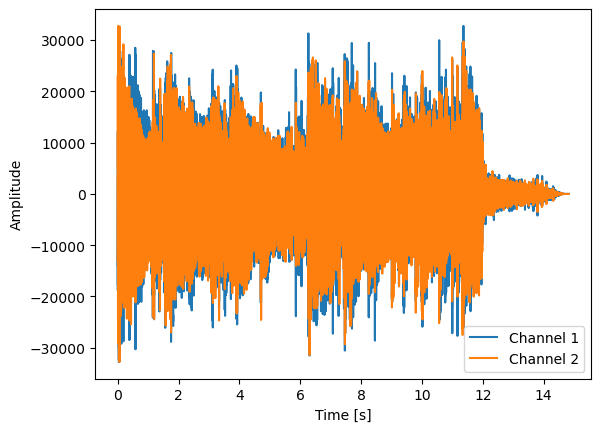

In [34]:
time = np.linspace(0., length, audio_data.shape[0])
for i in range(total_channels):
    plt.plot(time, audio_data[:, i], label=f"Channel {i+1}")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### 4.2. Reproducimos el audio.

In [35]:
IPython.display.Audio(audio_data.T, rate=sample_rate) # .T se pasa únicamente si es audio estéreo.

## 5. Hacemos la media por cada pareja de muestras de los canales. 

In [68]:
new_data_mono = audio_data.mean(axis=1)  # Column-wise.
nose = new_data_mono.astype(np.int16)
total_channels = 1

print(f'Frecuencia de muestreo (sample rate): {sample_rate/1000} kHz')
print(f"Duración: {length}s")
print('Datos de audio:')
print(f'- Número de canales: {total_channels}')
print(f'- Canal: {new_data_mono[:5]}...')
print(f'- Resolucion: {type(audio_data[0,0])}\n')

Frecuencia de muestreo (sample rate): 44.1 kHz
Duración: 14.82421768707483s
Datos de audio:
- Número de canales: 1
- Canal: [-4442.5  2968.5  3686.   3109.5  6231.5]...
- Resolucion: <class 'numpy.int16'>



### 5.1. Mostramos la grafica de la m

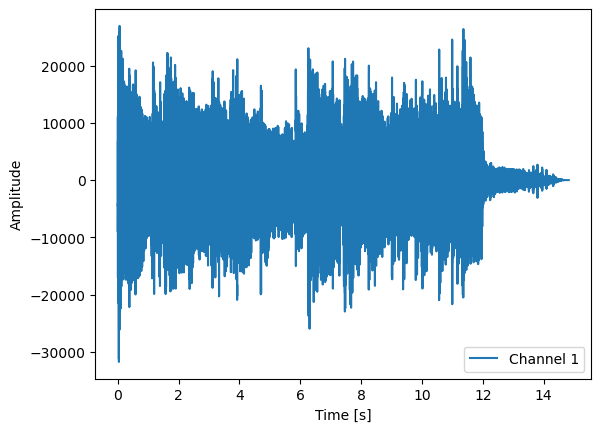

In [56]:
time = np.linspace(0., length, audio_data.shape[0])
plt.plot(time, new_data_mono, label=f"Channel {i+1}")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [57]:
IPython.display.Audio(new_data_mono, rate=sample_rate) # .T se pasa únicamente si es audio estéreo.